# Part 1: Exploratory Data Analysis (EDA)

In [ ]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


## Problem 1: Data Loading

### Q1: Dataset Dimensions

In [37]:
# Loading dataset
df = pd.read_csv("data/Titanic-Dataset.csv")

# Dimensional display
print("Dataset dimensions:", df.shape)
df.head(5)

Dataset dimensions: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Q2: Summary Statistics

In [38]:
# Columns of interest
cols = ["Age", "Fare", "SibSp", "Parch"]

# Summary statistics
summary_stats = df[cols].describe().T # .T made it work better and .describe() ignores missing values
summary_stats["std"] = df[cols].std()
summary_stats = summary_stats[["min", "max", "mean", "50%", "std"]]
summary_stats.rename(columns={"50%": "median"}, inplace=True)

print(summary_stats)

        min       max       mean   median        std
Age    0.42   80.0000  29.699118  28.0000  14.526497
Fare   0.00  512.3292  32.204208  14.4542  49.693429
SibSp  0.00    8.0000   0.523008   0.0000   1.102743
Parch  0.00    6.0000   0.381594   0.0000   0.806057


#### Interpretation
(a) What is the max, min, and average age of passengers?
- Ages range from 0.42 to 80 years, with an average of ~29.7 years.

(b) What was the median fare?
- Median fare = £14.45.

(c) Comparing the mean and median of `Fare`, was the distribution skewed, and if so,
in which direction?
- The mean (£32.20) is much greater than the median (£14.45), so the `Fare` distribution is right-skewed. A few passengers payed extremely high fares.

(d) Compute the standard deviation for `Fare`.
- σ_Fare = 49.69, which is large relative to the mean. This means that there is substantial variation.

(e) Which piece of passenger information has the largest spread?
- After comparing standard deviations, `Fare` shows the largest spread.

### Q3: Missing Data

In [39]:
# Count missing values per column
missing_counts = df.isnull().sum()
missing_percent = 100 * df.isnull().sum() / len(df)

# Combine into a table
missing_table = pd.DataFrame({
    "Variable": df.columns,
    "Missing Values": missing_counts.values,
    "Percent Missing": missing_percent.values.round(2)
})

# Filtering only columns with missing data
missing_table = missing_table[missing_table["Missing Values"] > 0]
print(missing_table)

    Variable  Missing Values  Percent Missing
5        Age             177            19.87
10     Cabin             687            77.10
11  Embarked               2             0.22


#### Interpretation
- The variable `Cabin` has the most missing entries. Approximately 77% of the data.
- `Age` has ~20% missing values
- `Embarked` has very few missing cases (<1%), and can be imputed

# Problem 2: Exploratory Visualization and Relationship Analysis

## Q4 - Visualize Categorical Data
Categorical data gets plotted with bar charts.  These columns are 'Sex', 'Embarked', 'Pclass'.

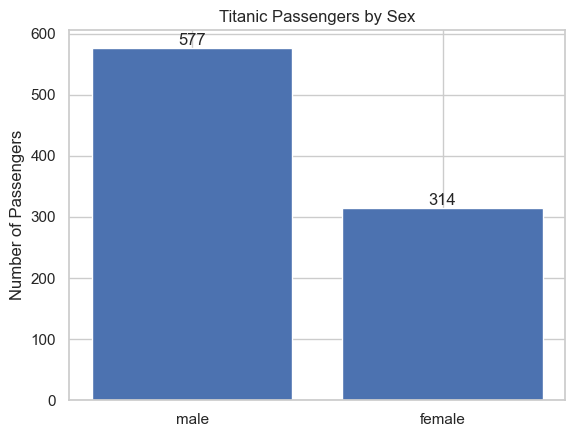

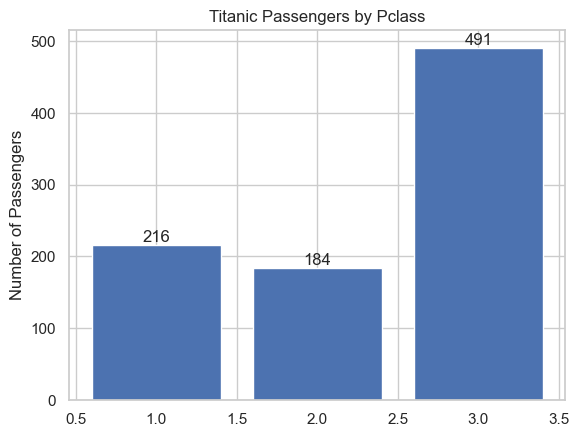

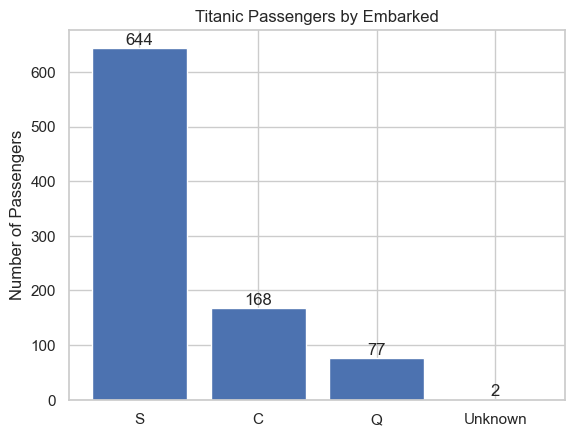

In [40]:
def plot_for_categorical(col_name, dataframe: pd.DataFrame):
    df_copy = dataframe.copy()

    # Any missing values get replaced with 'Unknown' so we can still plot it
    # We do not modify the original dataframe here
    df_copy = df_copy.fillna('Unknown')
    col_vals = df_copy[col_name].unique()
    col_counts = list()

    for val in col_vals:
        val_count = df_copy[df_copy[col_name] == val].shape[0]
        col_counts.append(val_count)

    fig, ax = plt.subplots()
    bar = ax.bar(col_vals, col_counts)
    ax.set(ylabel='Number of Passengers', title=f"Titanic Passengers by {col_name}")
    ax.bar_label(bar)

plot_for_categorical('Sex', df)
plot_for_categorical('Pclass', df) # The Pclass column has numbers, but they are actually for categorical purposes
plot_for_categorical('Embarked', df)

## Visualizing Numerical Data

In [41]:
def histogram_for_numerical(dataframe: pd.DataFrame, column):
    # dataframe.plot(kind="hist", title=f"{column} Frequencies on the Titanic", column=column, xlim=(0, df[column].max()))
    plt.hist(dataframe[column])
    plt.title(f"{column} Frequencies on the Titanic")
    plt.ylabel("Frequency")
    plt.xlabel(column)
    plt.show()

def box_plot_for_numerical(dataframe: pd.DataFrame, column):
    copied_df = dataframe.copy()
    col_vals = copied_df[column]

    # Matplotlib histogram can handle nulls, but boxplot cannot so we need to clear them out
    # https://stackoverflow.com/questions/44305873/how-to-deal-with-nan-values-when-plotting-a-boxplot
    filtered_col_vals = col_vals[~np.isnan(col_vals)]

    plt.boxplot(filtered_col_vals, showmeans=True)
    plt.ylabel(column)
    plt.title(f"Titanic {column} Box and Whisker Plot")
    plt.show()

### Fare

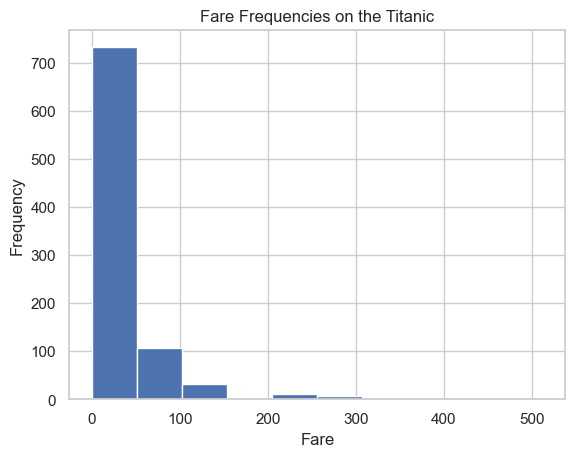

In [42]:
histogram_for_numerical(df, 'Fare')


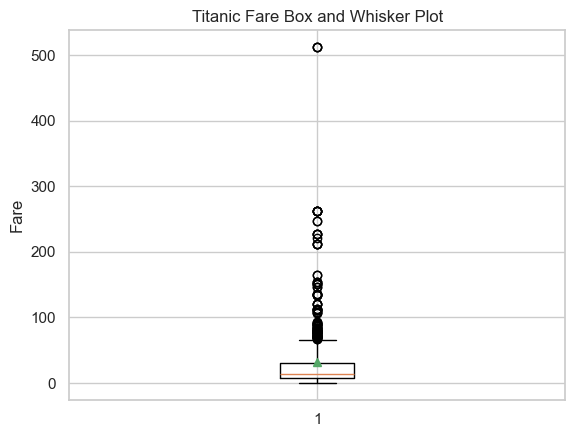

In [43]:
box_plot_for_numerical(df, 'Fare')

### Age

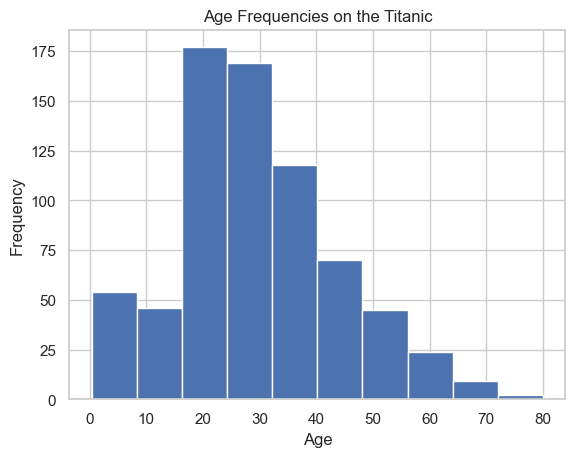

In [44]:
histogram_for_numerical(df, 'Age')

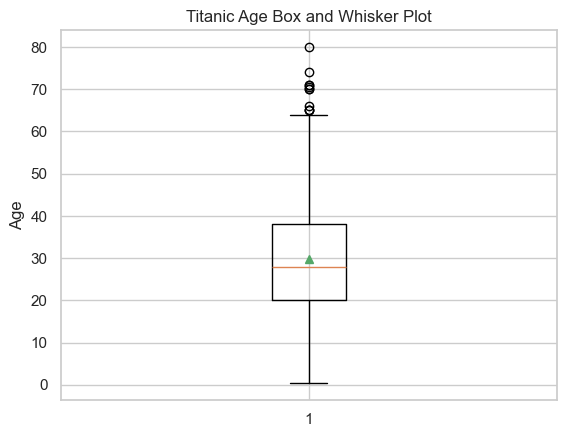

In [45]:
box_plot_for_numerical(df, 'Age')

### Q5 - Bivariate Analysis: Joint Distributions

Text(0.5, 1.0, 'Age and Fare of Passengers on the Titanic')

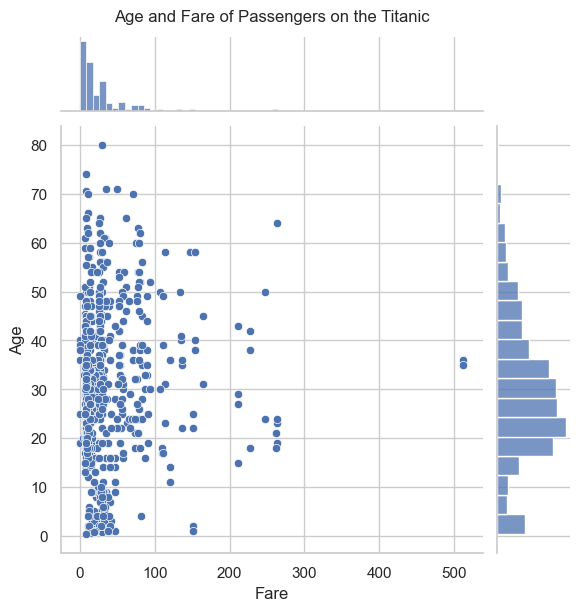

In [46]:
age_fare_plot = sns.jointplot(data=df, x="Fare", y="Age")
age_fare_plot.ax_joint.set_title("Age and Fare of Passengers on the Titanic", pad=75)

Text(0.5, 1.0, 'SibSp and Parch of Passengers on the Titanic')

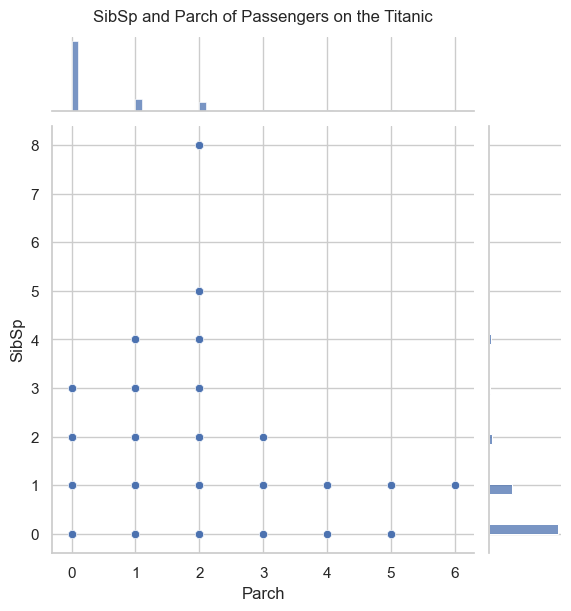

In [47]:
age_fare_plot = sns.jointplot(data=df, x="Parch", y="SibSp")
age_fare_plot.ax_joint.set_title("SibSp and Parch of Passengers on the Titanic", pad=75)

### Spearman Correlation Heatmap

             PassengerId  Survived   Pclass      Age    SibSp    Parch  \
PassengerId      1.00000  -0.00501 -0.03409  0.04101 -0.06116  0.00124   
Survived        -0.00501   1.00000 -0.33967 -0.05257  0.08888  0.13827   
Pclass          -0.03409  -0.33967  1.00000 -0.36167 -0.04302 -0.02280   
Age              0.04101  -0.05257 -0.36167  1.00000 -0.18206 -0.25421   
SibSp           -0.06116   0.08888 -0.04302 -0.18206  1.00000  0.45001   
Parch            0.00124   0.13827 -0.02280 -0.25421  0.45001  1.00000   
Fare            -0.01398   0.32374 -0.68803  0.13505  0.44711  0.41007   

                Fare  
PassengerId -0.01398  
Survived     0.32374  
Pclass      -0.68803  
Age          0.13505  
SibSp        0.44711  
Parch        0.41007  
Fare         1.00000  


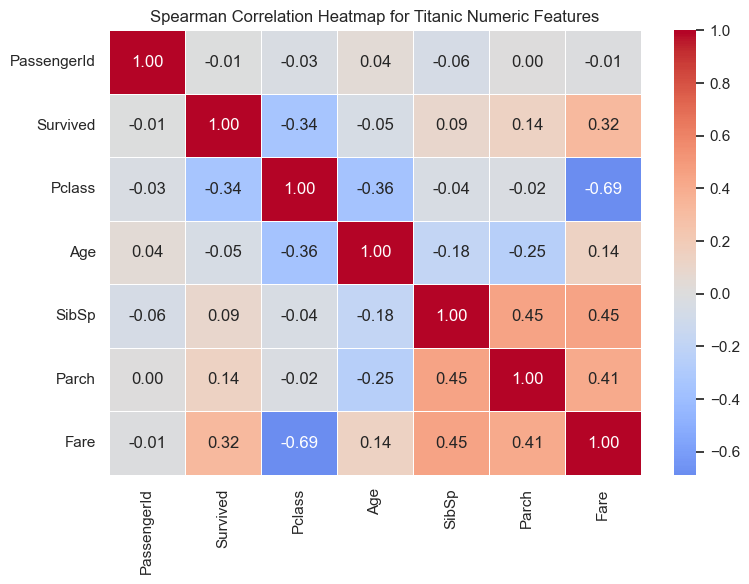

In [48]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Compute Spearman correlation matrix
spearman_corr = numeric_df.corr(method='spearman')

# Print matrix
print(spearman_corr.round(5))

# Plot heatmap
plt.figure(figsize = (8,6))
sns.heatmap(spearman_corr,
            annot = True, # Show correlation values in each cell
            cmap = 'coolwarm', # Diverging colormap
            center = 0, # Center at the zero correlation
            fmt = '.2f', # formatting numeric values
            linewidths = 0.5)

plt.title("Spearman Correlation Heatmap for Titanic Numeric Features", fontsize = 12)
plt.tight_layout()
plt.show()

### Q6 - Multivariate/Grouped Analysis

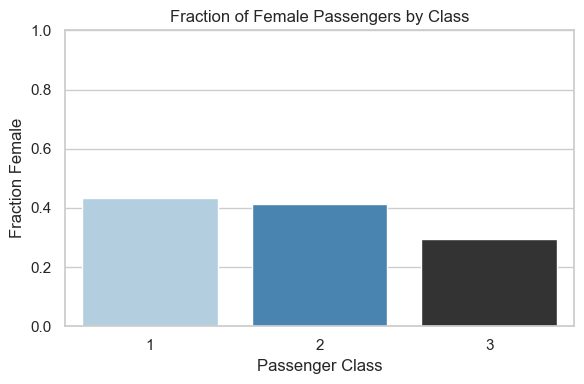

   Pclass  Fraction_Female
0       1         0.435185
1       2         0.413043
2       3         0.293279


In [49]:
# Group by passenger class and compute fraction of females
female_fraction = df[df['Sex'] == 'female'].groupby('Pclass')['Sex'].count() / df.groupby('Pclass')['Sex'].count()

# Convert to data frame for plotting
female_fraction = female_fraction.reset_index()
female_fraction.columns = ['Pclass', 'Fraction_Female']

# Bar chart
plt.figure(figsize = (6, 4))
sns.barplot(data = female_fraction, x = 'Pclass', y = 'Fraction_Female', hue = 'Pclass', palette = 'Blues_d', legend = False)
plt.title('Fraction of Female Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fraction Female')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

print(female_fraction)

<Figure size 500x500 with 0 Axes>

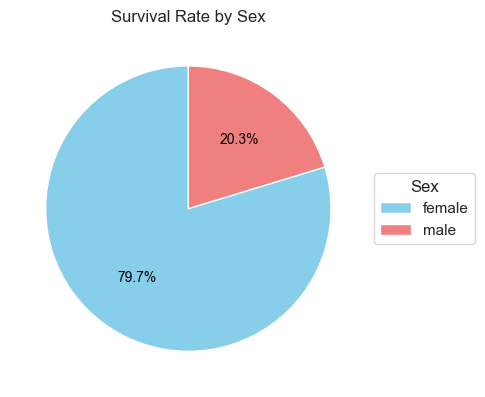

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [50]:
# Additional grouped visualization

# Survival rates by sex
survival_by_sex = df.groupby('Sex')['Survived'].mean()

# π chart
plt.figure(figsize=(5, 5))
plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(
    survival_by_sex,
    autopct='%1.1f%%', # Display numeric values on slices
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    textprops={'fontsize': 10, 'color': 'black'}
) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

# Add a legend instead of labels on the slices
plt.legend(
    wedges,
    survival_by_sex.index,
    title='Sex',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.title('Survival Rate by Sex')
plt.tight_layout()
plt.show()

print(survival_by_sex)

## Problem 3: Dimensionality Reduction with PCA and t-SNE

In [51]:
def preprocess_dataset(original_frame: pd.DataFrame, cols_to_drop: list):
    data = original_frame.copy()

    # Drop unnecessary columns
    data.drop(columns=cols_to_drop, inplace=True)

    # Get remaining columns
    columns = data.columns

    # Get the modes, which we'll use to fill missing values
    mode_frame = data.mode()

    # Fill in any missing values
    for col in columns:
        col_mode = mode_frame[col][0]
        data[col].fillna(value=col_mode, inplace=True)

    # Get nonnumeric columns
    cat_columns = data.select_dtypes(include=object).columns.tolist()

    # Loop through, get the unique values and convert them to numeric values
    # We don't want to lose them/we may want something to check against later, so store them in a dictionary to return
    # TODO: May not be feasible since everything needs to be turned into z-scores anyway
    cat_vals = dict()

    for col in cat_columns:
        vals = data[col].unique()
        col_dict = dict()

        # Replace those values with the index in the list - keeps things simple
        # np.ndenumerate allows us to get the index instead of keeping track of it manually
        for index, val in np.ndenumerate(vals):
            data.loc[data[col]==val, col] = index[0]

            # We do the index as the key because with the cleaned frame the values will be the index and we'll need it to look up the original categorical value
            col_dict.update({index:val})

        # You get the individual column dictionary by the name of the column here
        cat_vals.update({col:col_dict})

    # Finally, turn everything into z-scores
    # Joe Bathelt's answer was more helpful than the scipy library: https://stackoverflow.com/questions/24761998/pandas-compute-z-score-for-all-columns
    data = (data - data.mean())/data.std()

    return data, cat_vals

processed_frame, cat_dict = preprocess_dataset(df, ['PassengerId', 'Name', 'Cabin', 'Pclass', 'Ticket'])
processed_frame

C:\Users\jmong\AppData\Local\Temp\ipykernel_26500\2387197154.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(value=col_mode, inplace=True)


,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.788829,-0.737281,-0.497514,0.43255,-0.473408,-0.502163,-0.568518
1,1.266279,1.354813,0.714647,0.43255,-0.473408,0.786404,1.004617
2,1.266279,1.354813,-0.194474,-0.474279,-0.473408,-0.48858,-0.568518
3,1.266279,1.354813,0.487367,0.43255,-0.473408,0.420494,-0.568518
4,-0.788829,-0.737281,0.487367,-0.474279,-0.473408,-0.486064,-0.568518
...,...,...,...,...,...,...,...
886,-0.788829,-0.737281,-0.118714,-0.474279,-0.473408,-0.386454,-0.568518
887,1.266279,1.354813,-0.724794,-0.474279,-0.473408,-0.044356,-0.568518
888,-0.788829,1.354813,-0.345994,0.43255,2.007806,-0.176164,-0.568518
889,1.266279,-0.737281,-0.194474,-0.474279,-0.473408,-0.044356,1.004617


#### Q7
All rows now have complete data.  Any unnecessary columns were dropped, and any missing data was replaced with the mode of that column.  Remaining categorical data columns were converted to numerical by getting a list of unique values for that column and replacing the string value with the index of it in the list.

### Principal Component Analysis

#### Q8
None of the components are dropped - in other words, all components are kept and considered in the PCA, and their ratios sum to 1.

In [52]:
pca = PCA(n_components=None)
fit_frame = pca.fit_transform(processed_frame)
print(pca.explained_variance_ratio_)

[0.27620418 0.20296099 0.15490986 0.13185055 0.09723652 0.0793784
 0.05745951]


#### Q9
The explained variance ratio is `[0.27620418 0.20296099 0.15490986 0.13185055 0.09723652 0.0793784 0.05745951]`.

Text(0.5, 0, 'Number of Components')

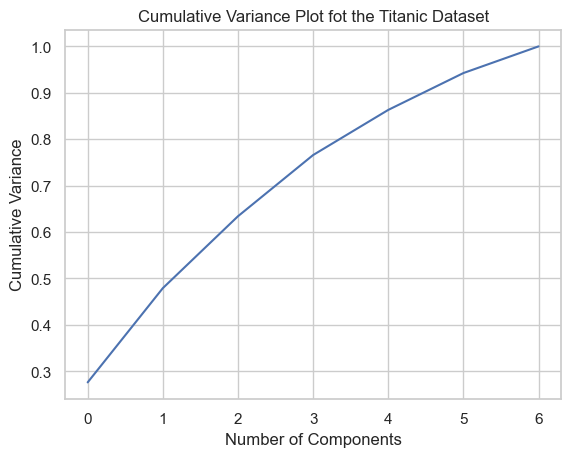

In [53]:
# Referred to here for understanding what a cumulative variance plot is:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
ax = (sns.lineplot(np.cumsum(pca.explained_variance_ratio_)))
ax.set_title("Cumulative Variance Plot fot the Titanic Dataset")
ax.set_ylabel("Cumulative Variance")
ax.set_xlabel("Number of Components")

#### Q10
Referred to [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) for help with reading the plot.  The first two components explain a little less than 50% of the variance
It looks like at most we would want to remove at most 2 components; nearly 90% of the variance is explained by 5 components.  This is not a very dramatic curve, and it seems as though removing columns would come at more of a cost than we really need - of note, we aren't considering very many features to begin with, so dimensionality reduction doesn't seem as vital in this case.

#### Q11
Considering Q10 asked for the variance described by the first two components, I am assuming this is what is expected to be plotted on the scatter plot.  Referred to [here](https://machinelearningmastery.com/principal-component-analysis-for-visualization/).

Text(0.5, 1.0, 'PCA Scatter Plot for First Two Components of Titanic Dataset')

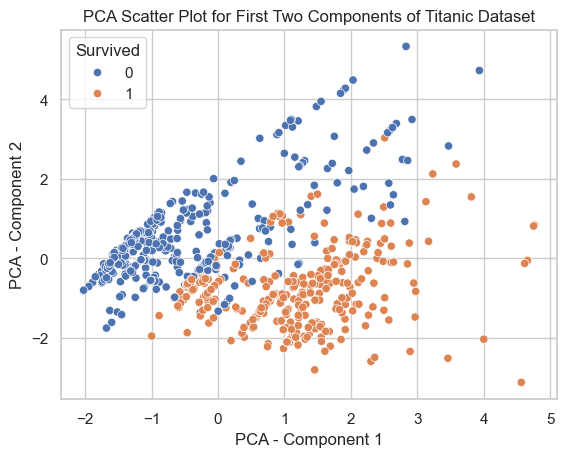

In [54]:
label = df['Survived']
plot = sns.scatterplot(x=fit_frame[:,0],y=fit_frame[:,1],hue=label)
plot.set_ylabel('PCA - Component 2')
plot.set_xlabel('PCA - Component 1')
plot.set_title('PCA Scatter Plot for First Two Components of Titanic Dataset')

There appears to be a linear divide between the two groups, with some overlap.  This indicates that this dataset would be a good candidate for linear regression or gradient descent, and we can also observe that it confirms the PCA analysis that indicated 65% of variance was explained by the first two components.

### t-Distributed Stochastic Neighbor Embedding
NOTE: Ignore the warnings, as this is an old version of sklearn.

Text(0.5, 1.0, 't-SNE Scatterplot for First two Components of Titanic Dataset')

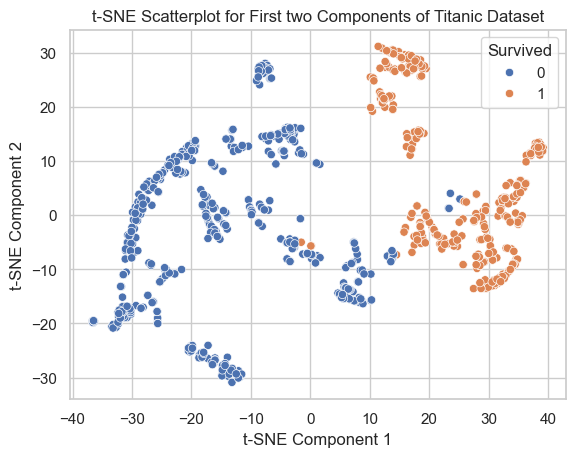

In [55]:
# Referred to here: https://simulationbased.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
tsne = TSNE(init='random', learning_rate='auto')
tsne_res = tsne.fit_transform(processed_frame)
tsne_plot = sns.scatterplot(x=tsne_res[:,0], y=tsne_res[:,1], hue=label)
tsne_plot.set_ylabel('t-SNE Component 2')
tsne_plot.set_xlabel('t-SNE Component 1')
tsne_plot.set_title('t-SNE Scatterplot for First two Components of Titanic Dataset')

#### Q12
The plot for PCA seemed more interpretable; there was a clear linear relationship present.  In t-SNE, we see a pattern more along the lines of a cluster.

## Problem 4: Batch Gradient Descent
We are looking to predict Fare given Age.

In [56]:
# Create scaled versions of Age and Fare for gradient descent
scaler_age = StandardScaler()
scaler_fare = StandardScaler()

# Handle missing values before scaling (you can use your mode approach or mean)
age_cleaned = df['Age'].fillna(df['Age'].median())
fare_cleaned = df['Fare'].fillna(df['Fare'].median())

# Scale the features
df['Age_scaled'] = scaler_age.fit_transform(age_cleaned.values.reshape(-1, 1))
df['Fare_scaled'] = scaler_fare.fit_transform(fare_cleaned.values.reshape(-1, 1))

print("\nOriginal Age - Mean:", df['Age'].mean(), "Std:", df['Age'].std())
print("Scaled Age - Mean:", df['Age_scaled'].mean(), "Std:", df['Age_scaled'].std())
print("\nOriginal Fare - Mean:", df['Fare'].mean(), "Std:", df['Fare'].std())
print("Scaled Fare - Mean:", df['Fare_scaled'].mean(), "Std:", df['Fare_scaled'].std())


Original Age - Mean: 29.69911764705882 Std: 14.526497332334042
Scaled Age - Mean: 2.272779794518839e-16 Std: 1.0005616400330457

Original Fare - Mean: 32.204207968574636 Std: 49.6934285971809
Scaled Fare - Mean: 3.987332972840069e-18 Std: 1.0005616400330457


In [57]:
def predict(w, b, x_col, y_col, dataset: pd.DataFrame):
    data = dataset.copy()

    # Only retain the columns we care about
    data = data[[x_col, y_col]]

    data[f'Predicted {y_col}'] = data[x_col] * w + b
    return data

def mean_squared_error(y_col, result_set: pd.DataFrame):
    m = result_set.shape[0]

    result_set['Squared Error'] = (result_set[f'Predicted {y_col}'] - result_set[y_col]) ** 2
    mse = (1/(2 * m)) * np.sum(result_set['Squared Error'])

    # print(result_set)

    return mse

test_result_set = predict(0, 0, 'Age', 'Fare', df)
print(mean_squared_error('Fare', test_result_set))


1602.7738393778343


In [58]:
def weight_gradient(w, b, x, y):
    return 2 * x * ((w*x) + b - y)

def bias_gradient(w, b, x, y):
    return 2 * (w * x + b - y)

def calculate_new_weight_bias(w, b, x_col, y_col, alpha, result_set: pd.DataFrame):
    result_copy = result_set.copy()
    m = result_copy.shape[0]

    result_copy['Weight Gradients'] = result_copy.apply(lambda row: weight_gradient(w, b, x=row[x_col], y=row[y_col]), axis=1)
    result_copy['Bias Gradients'] = result_copy.apply(lambda row: bias_gradient(w, b, x=row[x_col], y=row[y_col]), axis=1)

    new_weight = w - ((1/(m)) * alpha * result_copy['Weight Gradients'].sum())
    new_bias = b - ((1/(m)) * alpha * result_copy['Bias Gradients'].sum())

    return new_weight, new_bias

def gradient_descent(w, b, x_col, y_col, alpha, n_iterations, orig_dataset: pd.DataFrame):
    """
    Calculate new weights based on the given resultset.
    :param w: Current weight.
    :param b: Current bias.
    :param x_col: The column with our predicting variable.
    :param y_col: The column holding the values we're predicting
    :param alpha: Learning rate.
    :param n_iterations: Number of iterations to run for
    :param orig_dataset: Dataset to run on.
    :return:
    """
    dataset = orig_dataset.copy()
    mode_frame = dataset.mode()

    x_mode = mode_frame[x_col][0]
    y_mode = mode_frame[y_col][0]
    dataset.fillna({x_col: x_mode}, inplace=True)
    dataset.fillna({y_col: y_mode}, inplace=True)


    mse_iterations = []
    last_mse = None

    for i in range(n_iterations):
        result_set = predict(w, b, x_col, y_col, dataset)
        mse = mean_squared_error(y_col, result_set)
        last_mse = mse
        mse_iterations.append((i, w, b, mse))

        w, b = calculate_new_weight_bias(w, b, x_col, y_col, alpha, result_set)

    print(f"Final MSE: {last_mse}")
    print(f"Final weight: {w}")
    print(f"Final bias: {b}")

    mse_df = pd.DataFrame(data=mse_iterations, columns=['Iteration', 'Weight', 'Bias', 'MSE'])

    return mse_df, w, b

mse_df_01, final_w_01, final_b_01 = gradient_descent(0, 0, 'Age', 'Fare', 0.1, 1000, df)
mse_df_01

c:\Users\jmong\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\jmong\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\jmong\AppData\Local\Temp\ipykernel_26500\2503534791.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  new_weight = w - ((1/(m)) * alpha * result_copy['Weight Gradients'].sum())


Final MSE: 0.0
Final weight: nan
Final bias: -inf


,Iteration,Weight,Bias,MSE
0,0,0.000000e+00,0.000000e+00,1.751888e+03
1,1,1.980891e+02,6.440842e+00,1.926733e+07
2,2,-3.886642e+04,-1.120168e+03,7.491085e+11
3,3,7.664099e+06,2.211695e+05,2.912703e+16
4,4,-1.511252e+09,-4.361107e+07,1.132525e+21
...,...,...,...,...
995,995,NaN,-inf,0.000000e+00
996,996,NaN,-inf,0.000000e+00
997,997,NaN,-inf,0.000000e+00
998,998,NaN,-inf,0.000000e+00


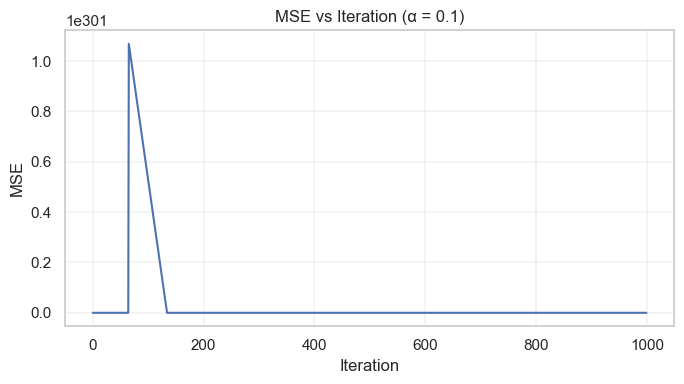

In [59]:
plt.figure(figsize=(7,4))
sns.lineplot(data=mse_df_01, x='Iteration', y='MSE')
plt.title('MSE vs Iteration (α = 0.1)')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid(True, linewidth=0.3)
plt.tight_layout()
plt.show()

Final MSE: 1237.5649081401411
Final weight: 0.8234447838590078
Final bias: 6.133739693031792


c:\Users\jmong\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\jmong\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\jmong\AppData\Local\Temp\ipykernel_26500\2503534791.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  new_weight = w - ((1/(m)) * alpha * result_copy['Weight Gradients'].sum())


Final MSE: 0.0
Final weight: nan
Final bias: inf


c:\Users\jmong\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\jmong\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\jmong\AppData\Local\Temp\ipykernel_26500\2503534791.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  new_weight = w - ((1/(m)) * alpha * result_copy['Weight Gradients'].sum())


Final MSE: 0.0
Final weight: nan
Final bias: inf


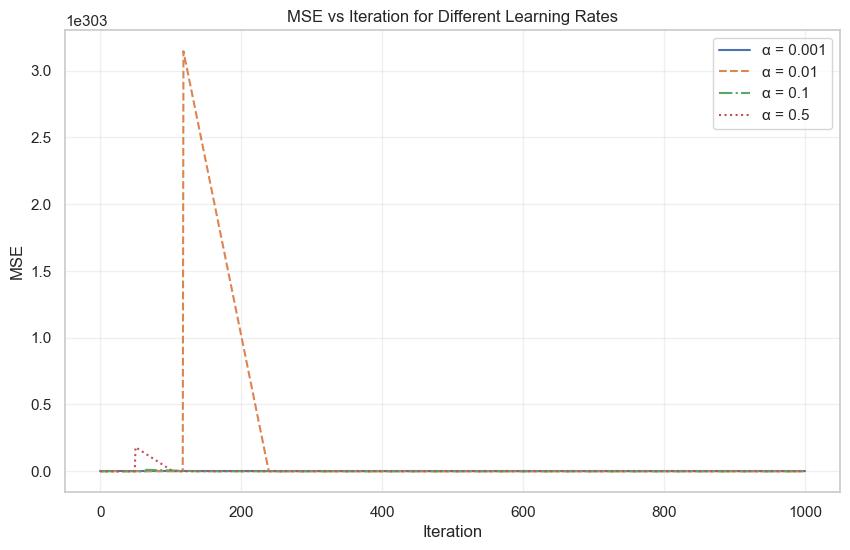

In [60]:
# Run gradient descent with different learning rates
mse_df_0001, final_w_0001, final_b_0001 = gradient_descent(0, 0, 'Age', 'Fare', 0.001, 1000, df)
mse_df_001, final_w_001, final_b_001 = gradient_descent(0, 0, 'Age', 'Fare', 0.01, 1000, df)
mse_df_05, final_w_05, final_b_05 = gradient_descent(0, 0, 'Age', 'Fare', 0.5, 1000, df)

# Combine all MSE dataframes for plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=mse_df_0001, x='Iteration', y='MSE', label='α = 0.001', linestyle='-', marker='')
sns.lineplot(data=mse_df_001, x='Iteration', y='MSE', label='α = 0.01', linestyle='--', marker='')
sns.lineplot(data=mse_df_01, x='Iteration', y='MSE', label='α = 0.1', linestyle='-.', marker='')
sns.lineplot(data=mse_df_05, x='Iteration', y='MSE', label='α = 0.5', linestyle=':', marker='')

plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs Iteration for Different Learning Rates')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Problem 6

### Q18 and Q19

In [ ]:
def generate_synthetic_titanic(df, n_rows=200, seed=42):
    rng = np.random.default_rng(seed)
    
    cols = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
    real = df[cols].copy()
    real = real.dropna(subset=['Pclass', 'Sex', 'Embarked', 'Survived'])

    # Empirical categorical frequencies
    pclass_probs = real['Pclass'].value_counts(normalize=True).sort_index()
    sex_probs = real['Sex'].value_counts(normalize=True)
    embarked_probs = real['Embarked'].value_counts(normalize=True)
    sibsp_probs = real['SibSp'].value_counts(normalize=True)
    parch_probs = real['Parch'].value_counts(normalize=True)


    age_nonnull = real['Age'].dropna()
    fare_nonnull = real['Fare'].dropna()

    # Conditional survival P(Survived | Sex, Pclass)
    cond_surv = real.groupby(['Sex', 'Pclass'])['Survived'].mean()

    synthetic_rows = []

    for _ in range(n_rows):
        pclass = rng.choice(pclass_probs.index, p=pclass_probs.values)
        sex = rng.choice(sex_probs.index, p=sex_probs.values)
        embarked = rng.choice(embarked_probs.index, p=embarked_probs.values)
        sibsp = rng.choice(sibsp_probs.index, p=sibsp_probs.values)
        parch = rng.choice(parch_probs.index, p=parch_probs.values)

        # Age: bootstrap + noise
        age_base = rng.choice(age_nonnull)
        age = float(np.clip(age_base + rng.normal(0, 3), 0.0, 80.0))

        # Fare: bootstrap from raw fare + noise, truncated at 0
        fare_base = rng.choice(fare_nonnull)
        fare = float(fare_base + rng.normal(0, 5))
        if fare < 0:
            fare = 0.0

        surv_prob = cond_surv.loc[(sex, pclass)]
        survived = int(rng.random() < surv_prob)

        synthetic_rows.append({
            'Survived': survived,
            'Pclass':   pclass,
            'Sex':      sex,
            'Age':      age,
            'SibSp':    sibsp,
            'Parch':    parch,
            'Fare':     fare,
            'Embarked': embarked
        })

    return pd.DataFrame(synthetic_rows)


synthetic_df = generate_synthetic_titanic(df, n_rows=200, seed=42)

real_summary = df[['Age','Fare','SibSp','Parch']].describe()
synthetic_summary = synthetic_df[['Age','Fare','SibSp','Parch']].describe()

print("Real data summary:")
print(real_summary)
print("\nSynthetic data summary:")
print(synthetic_summary)

Real data summary:
              Age        Fare       SibSp       Parch
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.523008    0.381594
std     14.526497   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     38.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000

Synthetic data summary:
              Age        Fare       SibSp       Parch
count  200.000000  200.000000  200.000000  200.000000
mean    27.235258   34.384784    0.595000    0.360000
std     14.474275   45.963989    1.268472    0.757144
min      0.000000    0.000000    0.000000    0.000000
25%     17.541557    7.980149    0.000000    0.000000
50%     25.312783   17.459209    0.000000    0.000000
75%     35.251382   37.918579    1.000000    0.000000
max     65.645284  267.365283    8.000

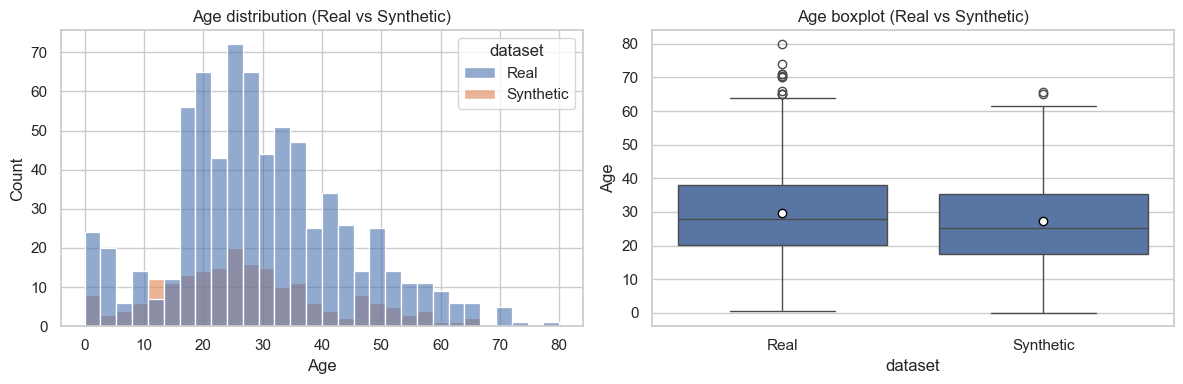

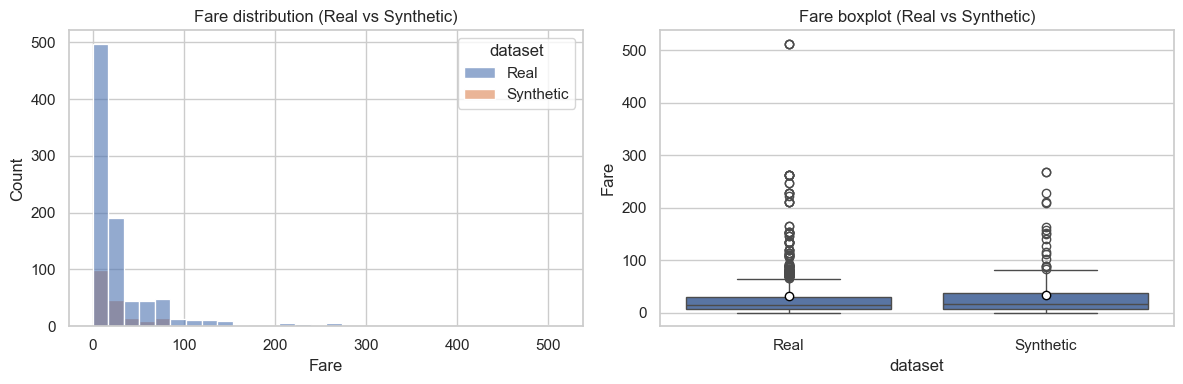

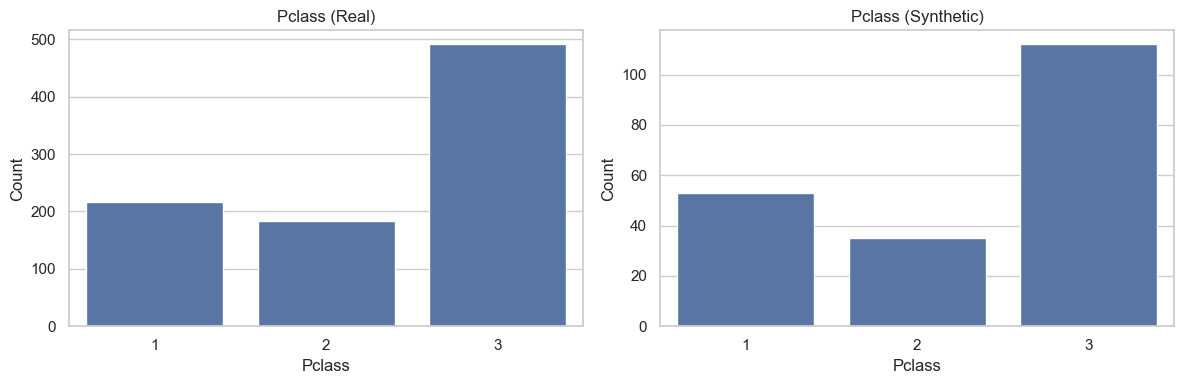

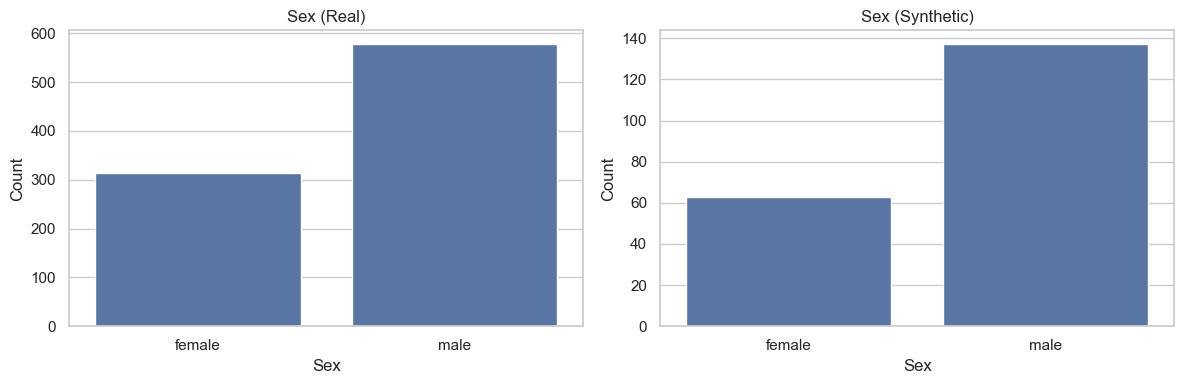

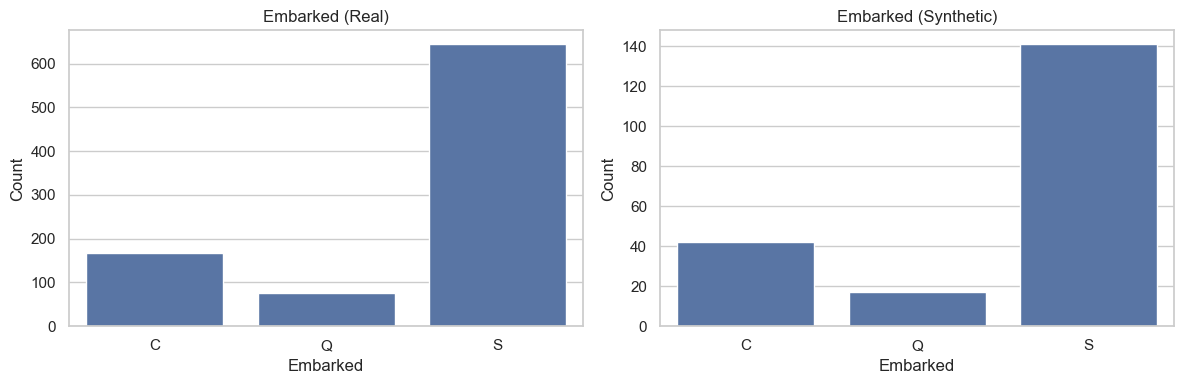

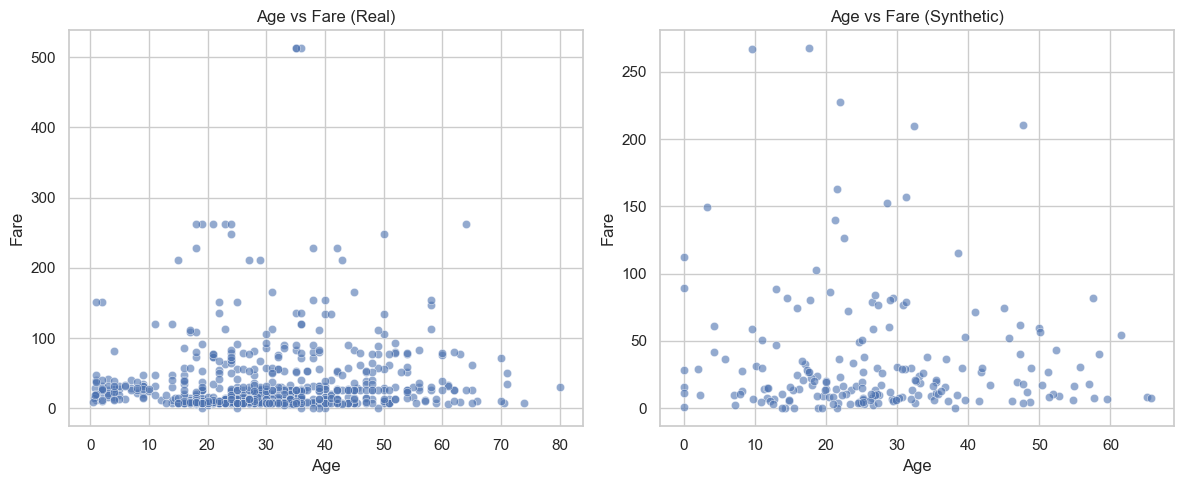

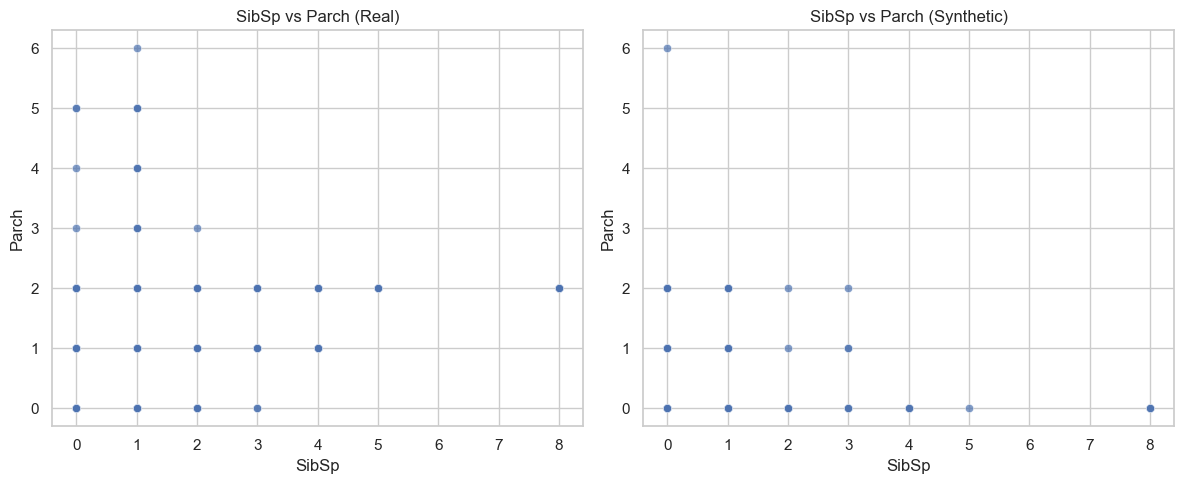

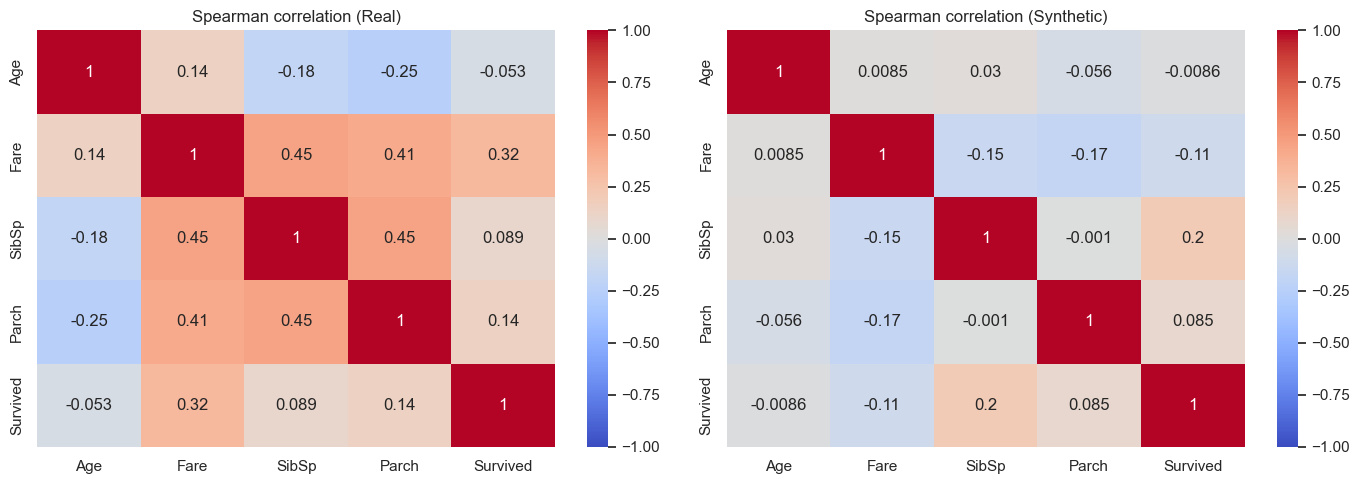

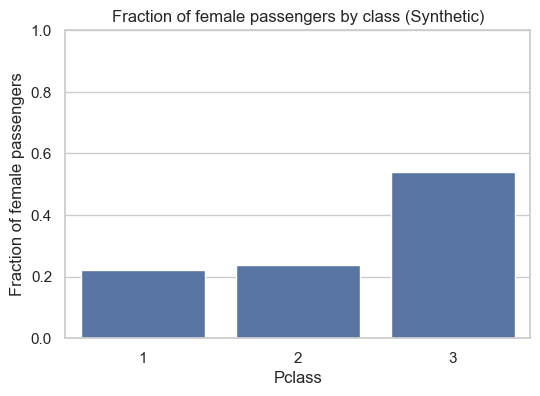

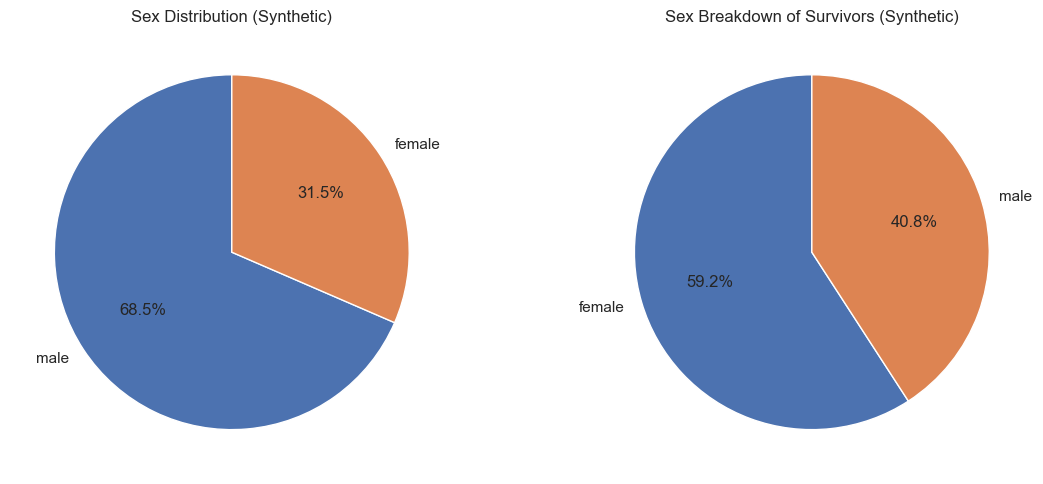

In [ ]:
sns.set(style="whitegrid") # https://seaborn.pydata.org/generated/seaborn.set_style.html

# add a dataset label so we can concat / compare easily
real_vis = df.copy()
real_vis["dataset"] = "Real"
synth_vis = synthetic_df.copy()
synth_vis["dataset"] = "Synthetic"

combined = pd.concat([real_vis, synth_vis], ignore_index=True)


# Univariate analysis: Age and Fare (histograms + boxplots)
numeric_cols = ["Age", "Fare"]

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histograms
    sns.histplot(data=combined, x=col, hue="dataset", kde=False, bins=30, ax=axes[0], multiple="layer", alpha=0.6)
    axes[0].set_title(f"{col} distribution (Real vs Synthetic)")
    
    # Boxplots
    sns.boxplot(data=combined, x="dataset", y=col, ax=axes[1], showmeans=True, meanprops={"marker": "o", "markeredgecolor": "black", "markerfacecolor": "white"})
    axes[1].set_title(f"{col} boxplot (Real vs Synthetic)")
    
    plt.tight_layout()
    plt.show()

    # Histogram with overlapping bars - https://seaborn.pydata.org/generated/seaborn.histplot.html

# Univariate analysis: categorical (Pclass, Sex, Embarked)
cat_cols = ["Pclass", "Sex", "Embarked"]

for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Real
    sns.countplot(data=real_vis, x=col, ax=axes[0], order=sorted(real_vis[col].dropna().unique()))
    axes[0].set_title(f"{col} (Real)")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Count")
    
    # Synthetic
    sns.countplot(data=synth_vis, x=col, ax=axes[1], order=sorted(synth_vis[col].dropna().unique()))
    axes[1].set_title(f"{col} (Synthetic)")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Count")
    
    plt.tight_layout()
    plt.show()


# Bivariate analysis: Age vs Fare and SibSp vs Parch (scatter plots, Real vs Synthetic)
# Age vs Fare
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=real_vis, x="Age", y="Fare", ax=axes[0], alpha=0.6)
axes[0].set_title("Age vs Fare (Real)")

sns.scatterplot(data=synth_vis, x="Age", y="Fare", ax=axes[1], alpha=0.6)
axes[1].set_title("Age vs Fare (Synthetic)")

plt.tight_layout()
plt.show()

# SibSp vs Parch
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=real_vis, x="SibSp", y="Parch", ax=axes[0], alpha=0.7)
axes[0].set_title("SibSp vs Parch (Real)")

sns.scatterplot(data=synth_vis, x="SibSp", y="Parch", ax=axes[1], alpha=0.7)
axes[1].set_title("SibSp vs Parch (Synthetic)")

plt.tight_layout()
plt.show()


# Spearman correlation matrices (numeric features) and heatmaps
num_features = ["Age", "Fare", "SibSp", "Parch", "Survived"]

real_corr = real_vis[num_features].corr(method="spearman")
synth_corr = synth_vis[num_features].corr(method="spearman")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(real_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Spearman correlation (Real)")

sns.heatmap(synth_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Spearman correlation (Synthetic)")

plt.tight_layout()
plt.show()


# Grouped analysis for synthetic data:
# Fraction of female passengers in 1st vs 3rd class (bar chart)
# Another variable as a pie chart (e.g., Survived distribution)

# Fraction of female passengers in first vs third class (Synthetic only)
female_synth = synth_vis[synth_vis["Sex"] == "female"]
class_counts = female_synth["Pclass"].value_counts(normalize=True).sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index.astype(str),y=class_counts.values)
plt.title("Fraction of female passengers by class (Synthetic)")
plt.xlabel("Pclass")
plt.ylabel("Fraction of female passengers")
plt.ylim(0, 1)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Pie chart 1: Sex distribution (synthetic)
sex_counts = synth_vis["Sex"].value_counts()
axes[0].pie(sex_counts.values, labels=[str(k) for k in sex_counts.index], autopct="%1.1f%%", startangle=90)
axes[0].set_title("Sex Distribution (Synthetic)")



# Pie chart 2: Sex breakdown of survivors (synthetic)
survivors = synth_vis[synth_vis["Survived"] == 1]
sex_counts_surv = survivors["Sex"].value_counts()

axes[1].pie(sex_counts_surv.values, labels=[str(k) for k in sex_counts_surv.index], autopct="%1.1f%%", startangle=90)
axes[1].set_title("Sex Breakdown of Survivors (Synthetic)")


plt.tight_layout()
plt.show()

# Documentation for subplots to format and make them adjacent 
# - https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# - https://matplotlib.org/stable/gallery/subplots_axes_and_figures/ganged_plots.html